In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
t=pd.read_csv("tested.csv")
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
t.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
t["Age"].value_counts()

21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: Age, Length: 79, dtype: int64

In [6]:
mn=t["Age"].mean()
mn

30.272590361445783

In [7]:
t["Age"].replace(np.nan,inplace=True)
t["Age"].fillna(mn)
t["Age"].isna().sum()

0

In [8]:
t["Cabin"].isna().sum()

327

In [9]:
t.drop("Cabin",axis=1,inplace=True)

In [10]:
t["Fare"].value_counts()

7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: Fare, Length: 169, dtype: int64

In [11]:
fmn=t["Fare"].mean()
fmn

35.6271884892086

In [12]:
t["Fare"].replace(np.nan,inplace=True)
t["Fare"].fillna(fmn)
t["Fare"].isna().sum()

0

In [13]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [14]:
t.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [15]:
dt=['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']

In [16]:
x=t[dt]
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,38.5,0,0,359309,8.0500,S


In [17]:
y=t["Survived"]
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

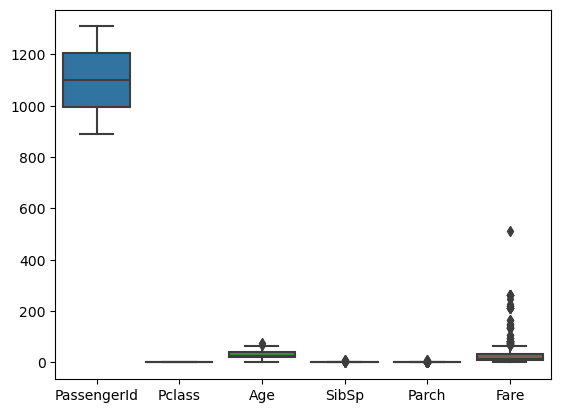

In [18]:
sns.boxplot(data=x)
plt.show();

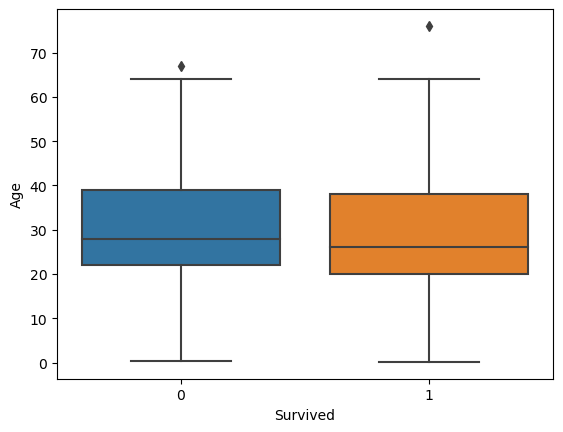

In [19]:
sns.boxplot(data=t,x="Survived",y="Age")
plt.show();

In [20]:
t[(t.Age>65)&(t.Survived==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,S


In [21]:
t[(t.Age>70)&(t.Survived==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.85,S


In [22]:
t.drop([81,96],axis=0,inplace=True)

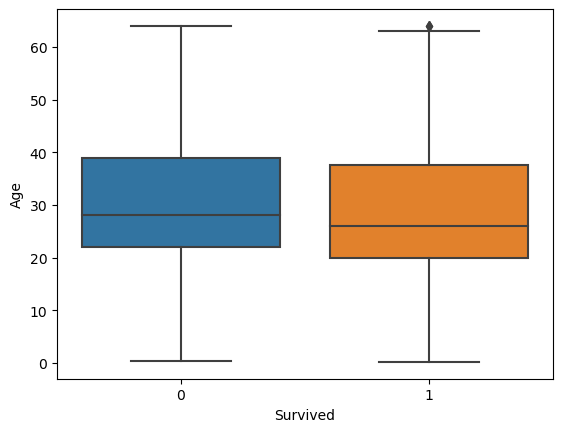

In [23]:
sns.boxplot(data=t,x="Survived",y="Age")
plt.show();

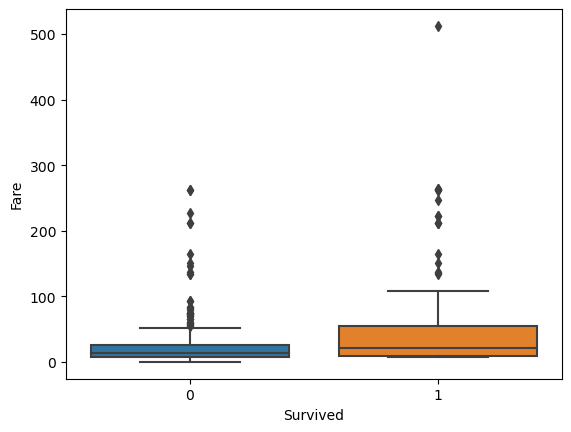

In [24]:
sns.boxplot(data=t,x="Survived",y="Fare")
plt.show();

In [25]:
t[(t.Fare>500)&(t.Survived==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
343,1235,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,C


In [26]:
colname=x.select_dtypes("int64","float64").columns
colname

Index(['PassengerId', 'Pclass', 'SibSp', 'Parch'], dtype='object')

PassengerId
0.0


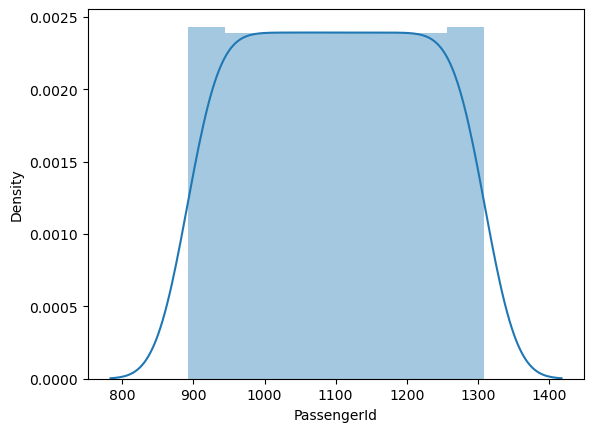

Pclass
-0.5322515550236273


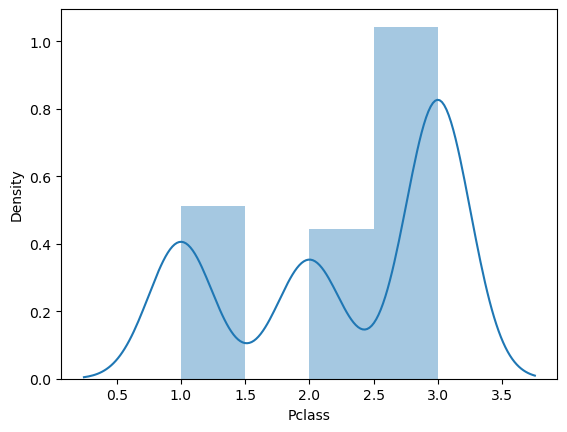

SibSp
4.153363487531833


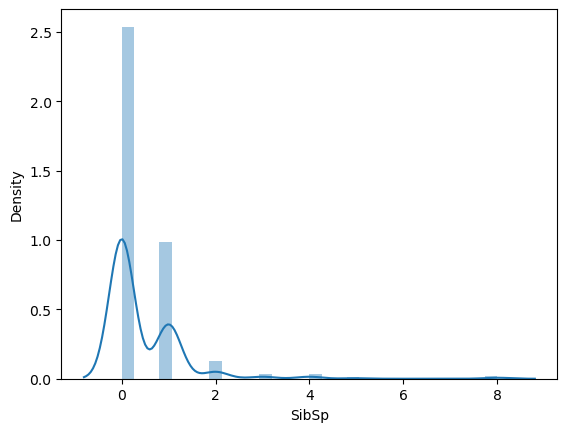

Parch
4.637742407278109


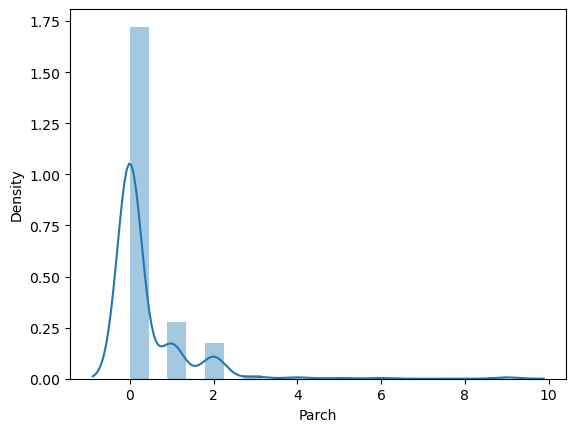

In [27]:
from scipy.stats import skew

for i in colname:
    print(i)
    print(skew(x[i]))
    plt.figure()
    sns.distplot(x[i])
    plt.show();

In [28]:
colnamex=x.select_dtypes("object").columns
colnamex

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [29]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
x[colnamex]=oe.fit_transform(x[colnamex])
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,206.0,1.0,34.5,0,0,152.0,7.8292,1.0
1,893,3,403.0,0.0,47.0,1,0,221.0,7.0000,2.0
2,894,2,269.0,1.0,62.0,0,0,73.0,9.6875,1.0
3,895,3,408.0,1.0,27.0,0,0,147.0,8.6625,2.0
4,896,3,178.0,0.0,22.0,1,1,138.0,12.2875,2.0
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,353.0,1.0,28.0,0,0,267.0,8.0500,2.0
414,1306,1,283.0,0.0,39.0,0,0,324.0,108.9000,0.0
415,1307,3,332.0,1.0,38.5,0,0,346.0,7.2500,2.0
416,1308,3,384.0,1.0,38.5,0,0,220.0,8.0500,2.0


In [30]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x=mms.fit_transform(x)
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9
0,0.000000,1.0,0.494005,1.0,0.452723,0.000,0.000000,0.419890,0.015282,0.5
1,0.002398,1.0,0.966427,0.0,0.617566,0.125,0.000000,0.610497,0.013663,1.0
2,0.004796,0.5,0.645084,1.0,0.815377,0.000,0.000000,0.201657,0.018909,0.5
3,0.007194,1.0,0.978417,1.0,0.353818,0.000,0.000000,0.406077,0.016908,1.0
4,0.009592,1.0,0.426859,0.0,0.287881,0.125,0.111111,0.381215,0.023984,1.0
...,...,...,...,...,...,...,...,...,...,...
413,0.990408,1.0,0.846523,1.0,0.367005,0.000,0.000000,0.737569,0.015713,1.0
414,0.992806,0.0,0.678657,0.0,0.512066,0.000,0.000000,0.895028,0.212559,0.0
415,0.995204,1.0,0.796163,1.0,0.505473,0.000,0.000000,0.955801,0.014151,1.0
416,0.997602,1.0,0.920863,1.0,0.505473,0.000,0.000000,0.607735,0.015713,1.0


In [31]:
dt

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Embarked']

In [32]:
x.columns=dt
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.000000,1.0,0.494005,1.0,0.452723,0.000,0.000000,0.419890,0.015282,0.5
1,0.002398,1.0,0.966427,0.0,0.617566,0.125,0.000000,0.610497,0.013663,1.0
2,0.004796,0.5,0.645084,1.0,0.815377,0.000,0.000000,0.201657,0.018909,0.5
3,0.007194,1.0,0.978417,1.0,0.353818,0.000,0.000000,0.406077,0.016908,1.0
4,0.009592,1.0,0.426859,0.0,0.287881,0.125,0.111111,0.381215,0.023984,1.0
...,...,...,...,...,...,...,...,...,...,...
413,0.990408,1.0,0.846523,1.0,0.367005,0.000,0.000000,0.737569,0.015713,1.0
414,0.992806,0.0,0.678657,0.0,0.512066,0.000,0.000000,0.895028,0.212559,0.0
415,0.995204,1.0,0.796163,1.0,0.505473,0.000,0.000000,0.955801,0.014151,1.0
416,0.997602,1.0,0.920863,1.0,0.505473,0.000,0.000000,0.607735,0.015713,1.0


In [33]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [34]:
def mymodel(mod):
    mod.fit(xtrain,ytrain)
    ypred=mod.predict(xtest)
    
    train=mod.score(xtrain,ytrain)
    test=mod.score(xtest,ytest)
    
    print(f"Training Accuracy: {train}\nTesting Accuracy: {test}\n\n")
    print(classification_report(ytest,ypred))
    return mod

In [35]:
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
gbc=mymodel(GradientBoostingClassifier())

Training Accuracy: 1.0
Testing Accuracy: 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        55

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

